In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('..')
from utils import visualizing_colors
from utils import preprocessing_file
from utils.algorithm_simulated_annealing import SimulatedAnnealing

In [3]:
MIN_NO_DIM = 1
MAX_NO_DIM = 10
NO_COLORS = 5
COMB_COLORS = 2

#### Preprocessing file

In [4]:
data = [
    ['color_0','color_1',0],
    ['color_0','color_2',0],
    ['color_0','color_3',7],
    ['color_0','color_4',3],
    ['color_1','color_2',0],
    ['color_1','color_3',5],
    ['color_1','color_4',3],
    ['color_2','color_3',2],
    ['color_2','color_4',2],
    ['color_3','color_4',0]
]

In [5]:
df = pd.DataFrame(data, columns=['left', 'right', 'slider'])
assert df.shape[1] == 3

In [6]:
df.head()

,left,right,slider
0,color_0,color_1,0
1,color_0,color_2,0
2,color_0,color_3,7
3,color_0,color_4,3
4,color_1,color_2,0


In [7]:
df_color = preprocessing_file.preprocess_two_colors(df, NO_COLORS)
df_color = preprocessing_file.adjust_slider(df_color, no_colors=2)
print(f'Dataframe shape: {df_color.shape}')

Dataframe shape: (10, 3)


In [8]:
df_color.head()

,left,right,slider
0,0,1,1.0
1,0,2,1.0
2,0,3,0.3
3,0,4,0.7
4,1,2,1.0


#### Two dimensions

In [9]:
NO_DIM = 2

In [10]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10
# bounds
bounds = np.array([[-1.0, 1.0]] * NO_COLORS * NO_DIM)

Done!
f([ 0.649498   -0.20594324  0.01273609  0.32084764 -0.18839215 -0.66722157
  0.36014944 -0.08842036 -0.57076065  0.01480303]) = 0.939808


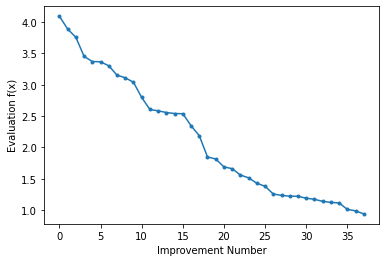

In [11]:
simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, NO_DIM, COMB_COLORS)
best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)
simulated_annealing.plot_iteration_curve(scores)
print('Done!')
print('f(%s) = %f' % (best, score))

In [12]:
_, dist_s = simulated_annealing.objective_two_colors(df_color, best)
dist_s

,real,estimated
0,1.0,0.826423
1,1.0,0.956471
2,0.3,0.312305
3,0.7,1.240065
4,1.0,1.008332
5,0.5,0.536839
6,0.7,0.658887
7,0.8,0.797439
8,0.8,0.781897
9,1.0,0.936616


In [13]:
best.shape

(10,)

Color 0 [-0.59899469  0.06292125]
Color 1 [ 0.05319384 -0.44464597]
Color 2 [0.22476667 0.54898178]
Color 3 [-0.30627008 -0.04592048]
Color 4 [ 0.62730427 -0.12133658]


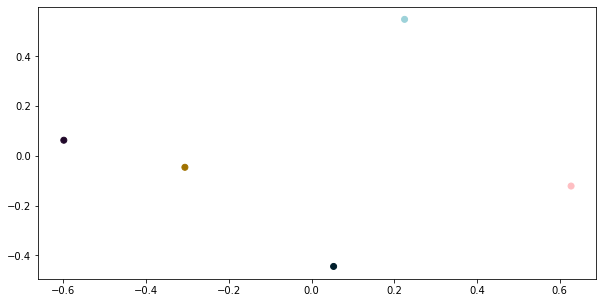

In [14]:
visualizing_colors.embedding(best, NO_DIM)

#### Four dimensions

In [15]:
NO_DIM = 4

In [16]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10
# bounds
bounds = np.array([[-1.0, 1.0]] * NO_COLORS * NO_DIM)

Done!
f([ 0.03843039  0.36945927  0.56146367 -0.08814029 -0.25555429  0.55434293
 -0.23153834 -0.44054786 -0.40911858 -0.08968576 -0.09092377  0.25242727
 -0.01097261  0.27896962  0.20964045 -0.23501478 -0.64678924  0.37257635
  0.27560982 -0.21205765]) = 0.759586


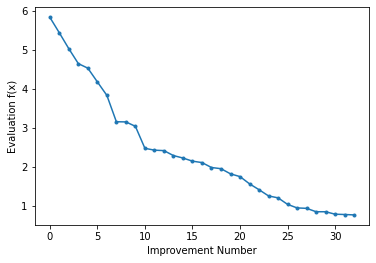

In [17]:
simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, NO_DIM, COMB_COLORS)
best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)
simulated_annealing.plot_iteration_curve(scores)
print('Done!')
print('f(%s) = %f' % (best, score))

In [18]:
_, dist_s = simulated_annealing.objective_two_colors(df_color, best)
dist_s

,real,estimated
0,1.0,0.934694
1,1.0,0.976069
2,0.3,0.394944
3,0.7,0.752731
4,1.0,0.968681
5,0.5,0.610355
6,0.7,0.703925
7,0.8,0.788902
8,0.8,0.787570
9,1.0,0.646455


Color 0 [-0.38276734 -0.34674065]
Color 1 [-0.06552876  0.52058371]
Color 2 [ 0.57492133 -0.20554731]
Color 3 [-0.1953029  -0.06586987]
Color 4 [0.06867768 0.09757412]


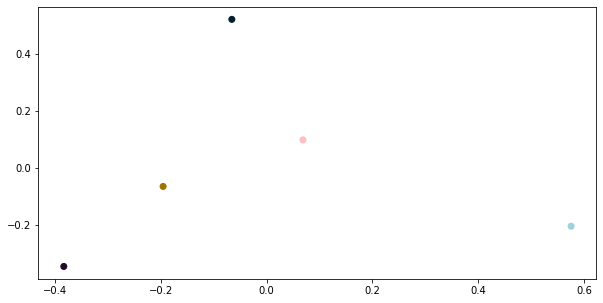

In [19]:
visualizing_colors.embedding(best, NO_DIM)

#### Iterate number of dimensions

In [20]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10

No dim 1 with score: 2.215257890703414
No dim 2 with score: 0.9672914836711543
No dim 3 with score: 0.7226694500804712
No dim 4 with score: 0.7243427378679886
No dim 5 with score: 0.8481592068975888
No dim 6 with score: 0.7739606674417874
No dim 7 with score: 0.8300499898438453
No dim 8 with score: 0.7913215683486559
No dim 9 with score: 0.8701871532980376


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

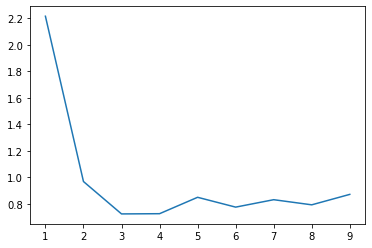

In [21]:
score_s = []
for no_dim in range(MIN_NO_DIM, MAX_NO_DIM):
    bounds = np.array([[-1.0, 1.0]] * NO_COLORS * no_dim)
    simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, no_dim, COMB_COLORS)
    best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)
    print(f'No dim {no_dim} with score: {score}')
    score_s.append(score)
fig, axs = plt.subplots()
axs.plot(score_s)
labels = np.arange(0, MAX_NO_DIM)
axs.set_xticklabels(labels)